<h1>光頭傑夫製作</h1><img src="https://rolqiw.bl.files.1drv.com/y4mYqkObWmQmdJFd8pab8t8m7d_mFhh3_YG63fiAnPaG6gjahHFt0n087pF97x1W2wemm7hd4ZdiPD2OxoPtqcCD_4-Jy-fojnt97kGGWR4Hnq0-9Ny61afd7WVHVTmF_9pcr45OFDFSwLKByeQU1q9TjwKk-HsNmWVsW1eGQ4Gi-9G4pQ5DYoTxswYJ5r5dLF-kKsA1InEyrqmV3kF5pm4WQ?width=658&height=584&cropmode=none" style='width:160px;margin:0'/>

# <span style="color:red ">你以為所有的網頁打開都是HTML碼嗎?
----
## [看一下看一下](http://www.webscrapingfordatascience.com/simplejavascript/)

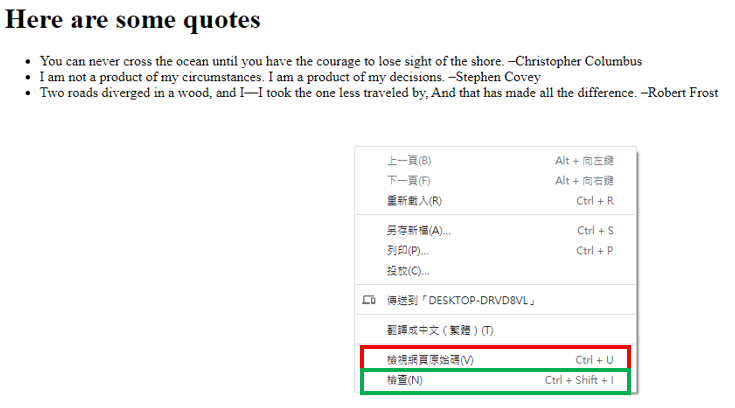

# <span style="color:red ">你有搞懂<檢查網頁原始碼>和<檢查>的不同嗎?
-------
    <檢查網頁原始碼>--->這是server給你的原始檔案
    <檢查>------------>這是已經被你的瀏覽器解譯後的檔案(就是收集多方資料後拼裝起來的結果)

# <span style="color:red ">爬下去

In [1]:
import requests
from bs4 import BeautifulSoup

url = 'http://www.webscrapingfordatascience.com/simplejavascript/'
r = requests.get(url)
html_soup = BeautifulSoup(r.text, 'lxml')

# No tag will be found here
ul_tag = html_soup.find('ul')
print(ul_tag)

script_tag = html_soup.find('script', attrs={'src': None})
print(script_tag)

None
<script>
	$(function() {
	document.cookie = "jsenabled=1";
	$.getJSON("quotes.php", function(data) {
		var items = [];
		$.each(data, function(key, val) {
			items.push("<li id='" + key + "'>" + val + "</li>");
		});
		$("<ul/>", {
			html: items.join("")
			}).appendTo("body");
		});
	});
	</script>


# <span style="color:red ">你看到甚麼?
-------
    1.不要懷疑，因為requests或是bs4都不帶Javascript Engine，所以網頁裡面找不到內容。
    2.找不到Html的結果，但是你可以看到JS碼。

# <span style="color:red ">當然，如果你們還是不死心...終究發現貓膩的...
-------
    你發現了下階段連接的路徑---quotes.php

In [ ]:
import requests
url = 'http://www.webscrapingfordatascience.com/simplejavascript/quotes.php'

# 注意 cookie 要帶上才可以拿到結果
r = requests.get(url, cookies={'jsenabled': '1'})
print(r.json())

# <span style="color:orange ">好吧!我是看到答案了!難道我就要這樣看懂那一堆無字天書，翻出可能的線索...才能...

# <span style="color:red ">爬蟲終極武器-selenium上場

In [ ]:
!pip install selenium

###    <span style="color:red ">Selenium是一個網站的自動化測試工具
     
       最初是為網站自動化測試而開發的，可以按照指定的命令自動操作。並且支持所有的主流瀏覽器
       你就直接把他想像成一個python可以調動的機器人，完全模擬一個人用滑鼠操作瀏覽器的過程
       請注意Selenium只是那個幫你操作瀏覽器的機器人，你還是要配瀏覽器給它用，那個瀏覽器叫做WebDriver。
       Chrome, Firefox,Safari都有出自己的WebDriver。

## <font color=red>webdriver要怎麼裝呢?

----
### 1. [下載你對應的版本](https://chromedriver.chromium.org/downloads)
       你的chrome裝哪一版?你的webdriver就裝哪一版
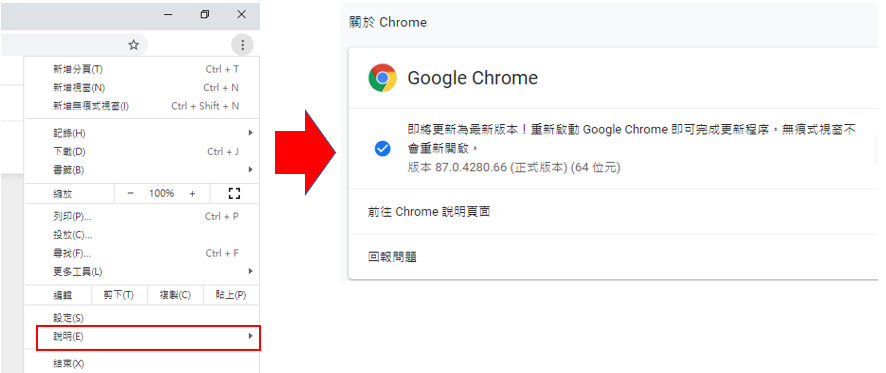
### 2. 很方便，就把它放進資料夾就好

## <span style="color:red ">webdriver裝好了，我們就來用用看吧!

In [ ]:
from selenium import webdriver

url = 'http://www.webscrapingfordatascience.com/complexjavascript/'
driver = webdriver.Chrome()
driver.get(url)
input('請按下enter來關閉視窗')

driver.quit()


## <span style="color:red ">你可以決定那個視窗大小

In [ ]:
from selenium import webdriver

url = 'http://www.webscrapingfordatascience.com/complexjavascript/'

driver = webdriver.Chrome()
#透過調整位置點和長寬，麻煩一下，driver連網頁之前就要設好，要不然看不到
driver.set_window_rect(x=30, y=30, width=100, height=600)

driver.get(url)
input('請按下enter來關閉視窗')

driver.quit()


## <span style="color:red ">你應該把webdriver，想像成一台遙控車，而你可以控制它...

### <span style="color:red ">回到上一頁-.back()

In [ ]:
from selenium import webdriver

driver = webdriver.Chrome()

#先到Yahoo
driver.get('https://tw.yahoo.com/?p=us')
#再去google
driver.get('https://google.com')
#回到上一頁
driver.back()
print("回到第一頁")

### <span style="color:red ">再到下一頁-.forward()

In [ ]:
from selenium import webdriver

driver = webdriver.Chrome()

#先到Yahoo
driver.get('https://tw.yahoo.com/?p=us')
#再去google
driver.get('https://google.com')
#回到上一頁
driver.back()
print("回到第一頁")


#再回到google
driver.forward()
print("回到google")

### <span style="color:red ">網頁重新整理-.refresh()

In [ ]:
from selenium import webdriver

driver = webdriver.Chrome()

#去google
driver.get('https://tw.piliapp.com/time-now/tw/taipei/')

print("網頁將重新整理")

#Page refresh command
driver.refresh()
print("已經重新整理")

###   <span style="color:red "> 聊一下-Headless
     
       Chrome自59版起內建了 Headless 模式，
       允許透過命令列啟動 Chrome 以無 GUI 方式執行，
       可以正常完成一模一樣的網頁渲染，並啟動JavaScript引擎供你驅使，還可透過網路連線遙控。
    
       Headless Chrome 就是指在 headless 的模式下模擬Chrome上網的運作。
       簡單的說，它就是把 Chromium 和Blink 渲染引擎所提供的所有現代網頁平台的特徵都轉化成了命令行。
       
       為什麼我們需要Headless-
          因為這樣我們就可以不用看到瀏覽器打開，又不能控制它...
          當然不是...有些時候你的爬蟲是要放在server的，那沒有GUI(graphical user interface)可以打開

###  <font color=red>啟動headless-無頭模式

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options

#你需要先拿到Options，才可以開始設定
chrome_options = Options() 
# 啟動無頭模式
chrome_options.add_argument('--headless')

url = 'http://www.webscrapingfordatascience.com/complexjavascript/'
driver = webdriver.Chrome(options=chrome_options)
driver.get(url)
driver.page_source

###  <font color=red>或許你想知道driver到底有哪些方法可以用

In [ ]:
dir(driver)

##    <span style="color:red ">一旦Selenium把網頁下載下來以後，Selenium跟BS4一樣，可以開始尋找元素
```
    • find_element_by_id
    • find_element_by_name
    • find_element_by_xpath
    • find_element_by_link_text
    • find_element_by_partial_link_text
    • find_element_by_tag_name
    • find_element_by_class_name
    • find_element_by_css_selector
```
###    上面這些方法，如果加了s(find_elements_by_)，就等於BS4裡面的findAll
----
### [參考文件](https://selenium-python.readthedocs.io/locating-elements.html)

##    <span style="color:red ">一旦Selenium把網頁下載下來以後，你還是可以用bs4分析的，所以不要以為這是兩個不同的世界...
```
   pageSource = driver.page_source
   bs = BeautifulSoup(pageSource, 'lxml')
   print(bs.find(id='content').get_text())
```


##    <span style="color:red ">請注意
### Selenium是很強 你看到什麼，它看到什麼
### BeautifulSoup更強，你看不到的，它也可以看到

## <font color=red>我們就來找找看元素吧!

In [ ]:
from selenium import webdriver
url = 'http://www.webscrapingfordatascience.com/complexjavascript/'

# chromedriver should be in the same path as your Python script
driver = webdriver.Chrome()
driver.get(url)

for quote in driver.find_elements_by_class_name('quote'):
    print(quote.text)
    
input('請按下enter來關閉視窗')
driver.quit()

#你會發現你甚麼東西都印不出來，花生甚麼事??

## <font color=red>有沒有搞錯啊???有quote，但是居然找不到
----
    關鍵問題是，瀏覽器讀到Javascript檔以後，要運作一下，才可以把html的內容擷取下來。
    但是檔案還沒擷取到，python的速度已經先把html讀了，
    當然是空白。
    所以這個問題我們要解決一下--->讓python等一會(wait!)!!
    

## <font color=red>< wait >出場    
----
    Wait分兩種
    Implicit Wait 與 Explicit Wait 
----
###    [想讀懂](https://kkboxsqa.wordpress.com/2017/06/16/the-difference-between-implicit-wait-and-explicit-wait/)
###    [原廠連結](https://selenium-python.readthedocs.io/waits.html)

## <font color=red>Implicit Wait版本
----
    特色就是設定一次，整個過程都適用
    所以對Beginner來說，非常簡單上手。

In [ ]:
#%%time
from selenium import webdriver

url = 'http://www.webscrapingfordatascience.com/complexjavascript/'
driver = webdriver.Chrome()

# Set an implicit wait
# 這裡設了以後，selenium知道碰到網頁讀取的時候，都要等一下
driver.implicitly_wait(10)

driver.get(url)
for quote in driver.find_elements_by_class_name('quote'):
    print(quote.text)

driver.quit()

## <font color=red>Implicit Wait-缺點
----
    並不是每一個元素讀取拼裝的過程時間都一樣，
    但是因為你一旦設了，全體適用，
    時間設長了，浪費時間，
    時間設短了，有些元素看不到...

## <font color=red>明明我已經把等待時間說清楚，為什麼還稱為Implicit Wait(隱性等待)???
----
    簡單的說，這就是時間到了看看有沒有目標元素，也不管這個元素是不是達到甚麼狀態?譬如可以點擊嗎?可以下拉嗎?

## <font color=red>Explicit Wait版本
-----
    當你成為高手，你的要求可能比較多了，
    你總希望可以爭取分分秒秒，要不然爬蟲可是一個累人的活兒...
    我們希望更精準地去判斷我們的元素可以用了嗎?
    不要忘了，selenium是用滑鼠爬蟲，按鈕不能按，怎麼爬??
-----
### [參考連結](https://selenium-python.readthedocs.io/api.html?highlight=WebDriverWait#selenium.webdriver.support.wait.WebDriverWait)
-----
### [EC中文解釋](https://www.itread01.com/content/1542335671.html)

In [ ]:
#%%time
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC
#注意一下，EC就是expected_conditions，裡面設計了很多的情境狀況，可以看下面的情況

url = 'http://www.webscrapingfordatascience.com/complexjavascript/'
driver = webdriver.Chrome()
driver.get(url)


#第一個參數，我們稱為locator，有很多種選擇
#By.ID, By.XPATH, By.NAME, By.TAG_NAME, By.CLASS_NAME, By.CSS_SELECTOR, By.LINK_TEXT, and By.PARTIAL_LINK_TEXT
#第二個參數根據前面的Locator變化
#因為我們選了By.CSS_SELECTOR，所以就是css值定義
#我要找的元素是帶有 “quote” CSS class 但是不帶 “decode” CSS class
#下面我們就看看10秒鐘和找到元素哪一個條件先達到
quote_elements = WebDriverWait(driver, 10).until(
                               EC.presence_of_all_elements_located((By.CSS_SELECTOR, ".quote:not(.decode)")
                            )
                 )

for quote in quote_elements:
    print(quote.text)

driver.quit()

In [ ]:
#讓我們看看EC裡面有什麼情境狀況可以用
from selenium.webdriver.support import expected_conditions as EC
dir(EC)

## <font color=red>Explicit Wait裡面的條件，也可以自己設計
-----
    從前面的例子，你會發現，如果你要用selenium進行爬蟲，你需要走走停停，因為網頁拼裝需要時間，
    所以你需要隨時確定到底這個步驟完成沒?可不可以進行下一步了?
    如果你高手中的高手，那你可能會想要自己動手，定義自己的EC。

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

url = 'http://www.webscrapingfordatascience.com/complexjavascript/'
driver = webdriver.Chrome()
driver.get(url)

class at_least_n_elements_found(object):
    def __init__(self, locator, n):
        self.locator = locator
        self.n = n
    def __call__(self, driver):
        # 這個部分，我們進行某些步驟運作，依據狀況來return，如果return False，就是告訴until，還沒好啦!繼續等
        # 如果找齊了，就 return 我們找到的全部元素
        # 關於那個*號，你還記得*arg嗎?因為我們現在是丟(By.CLASS_NAME, 'quote')進來
        elements = driver.find_elements(*self.locator)
        if len(elements) >= self.n:
            return elements
        else:
            return False

#現在我要求不是找到而已
#你要找到一定的數量，那才可以結束
wait = WebDriverWait(driver, 10)
element = wait.until(
            at_least_n_elements_found((By.CLASS_NAME, 'quote'), 3)
          )

for quote in element:
    print(quote.text)
    
driver.quit()

## <font color=red>剛剛找三個，現在換找10個

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

url = 'http://www.webscrapingfordatascience.com/complexjavascript/'
driver = webdriver.Chrome()
driver.get(url)

class at_least_n_elements_found(object):
    def __init__(self, locator, n):
        self.locator = locator
        self.n = n
    def __call__(self, driver):
        # 這個部分，我們進行某些步驟運作，最後要不是return False就是return 我們找到的元素
        # 關於那個*號，你還記得*arg嗎?因為我們現在是丟(By.CLASS_NAME, 'quote')進來
        elements = driver.find_elements(*self.locator)
        if len(elements) >= self.n:
            return elements
        else:
            return False

#現在我要求不是找到而已
#你要找到一定的數量，那才可以結束
wait = WebDriverWait(driver, 10)
element = wait.until(
            at_least_n_elements_found((By.CLASS_NAME, 'quote'), 10)
          )

for quote in element:
    print(quote.text)
    
driver.quit()

## <font color=red>如果找不到足夠元素，達不到目標就斷線，就癱瘓在哪裡，怎麼辦?

# <span style="color:red "> <測驗題>

---
請幫我解決一下前面，流程癱瘓，沒有關瀏覽器的問題...

### <span style="color:red "> <答案>

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.support import expected_conditions as EC

url = 'http://www.webscrapingfordatascience.com/complexjavascript/'
driver = webdriver.Chrome()
driver.get(url)

class at_least_n_elements_found(object):
    def __init__(self, locator, n):
        self.locator = locator
        self.n = n
    def __call__(self, driver):
        # Do something here and return False or something else
        # Depending on whether the condition holds
        elements = driver.find_elements(*self.locator)
        if len(elements) >= self.n:
            return elements
        else:
            return False

#現在我要求不是找到而已
#我要求找到10個，那才可以結束
wait = WebDriverWait(driver, 10)
try:
    element = wait.until(
                at_least_n_elements_found((By.CLASS_NAME, 'quote'), 10)
              )

    for quote in element:
        print(quote.text)

#最後可以把它關掉    
finally:
    driver.quit()

# <span style="color:red ">find_element_by_css_selector()
-----
### [參考連結](https://jzchangmark.wordpress.com/2015/03/16/selenium-%E4%BD%BF%E7%94%A8-css-locator-%E5%AE%9A%E4%BD%8D%E5%85%83%E4%BB%B6/)

# <span style="color:red ">ID  
    
-----
   我們知道selenium的selector有find_element_by_id ('id_attribute')的方法。   
   但是css選擇器，也有ID選擇器。  
   所以當然也可以產生一樣的效果。

### <span style="color:red ">第一種寫法

In [ ]:
from selenium import webdriver

url = 'https://tw.yahoo.com/?p=us'
driver = webdriver.Chrome()
driver.get(url)


driver.implicitly_wait(10)
#我要取得logo連結的href
div_element = driver.find_element_by_css_selector('#header-logo')
div_element.get_attribute('href')

### <span style="color:red ">第二種寫法

In [ ]:
from selenium import webdriver

url = 'https://tw.yahoo.com/?p=us'
driver = webdriver.Chrome()
driver.get(url)


driver.implicitly_wait(10)
#我要取得logo連結的href
#這樣也可以，讓你的選擇器更精準
div_element = driver.find_element_by_css_selector('a#header-logo')
div_element.get_attribute('href')

### <span style="color:red ">第三種寫法

In [ ]:
from selenium import webdriver

url = 'https://tw.yahoo.com/?p=us'
driver = webdriver.Chrome()
driver.get(url)


driver.implicitly_wait(10)
#我要取得logo連結的href
#這樣也可以，讓你的選擇器更精準
div_element = driver.find_element_by_css_selector('a[id="header-logo"]')
div_element.get_attribute('href')

## <font color=red>說到這裡，應該來聊聊selenium最厲害的地方了!-Action Chains
-----
    selenium就是模擬真人的瀏覽行為，那你上網都在幹嗎?
    肯定就是按滑鼠、打鍵盤啊!!
    那selenium也可以啦!!

## <font color=red>滑鼠動一動-Click-按左鍵

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains

driver = webdriver.Chrome()
driver.get("https://tw.yahoo.com/")
# 選取你要的元素
web_element=driver.find_element_by_link_text("拍賣")

#第一步你要用ActionChains把你的driver包起來
#然後選你的動作，參數就是你的目標元素
#最後perform就是啟動工作了啦!!
webdriver.ActionChains(driver).click(web_element).perform()

#簡易語法
#web_element.click()

## <font color=red>滑鼠動一動-Context Click-按右鍵

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains

driver = webdriver.Chrome()
driver.get("https://tw.yahoo.com/")
# Go to button
web_element=driver.find_element_by_link_text("拍賣")

webdriver.ActionChains(driver).context_click(web_element).perform()

## [動作類型](https://selenium-python.readthedocs.io/api.html#module-selenium.webdriver.common.action_chains)

# <span style="color:red "> <測驗題>

---
幫我模擬一下進momo首頁，把智慧型手機的網頁打開的過程，可以嗎??
### [momo](https://www.momoshop.com.tw/)

### <span style="color:red "> <答案>

In [ ]:
#先試試這個，看看可不可以
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By

driver = webdriver.Chrome()
driver.get("https://www.momoshop.com.tw/")


# Wait for sub menu to be displayed
WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.LINK_TEXT, "智慧型手機")))
driver.find_element_by_link_text("智慧型手機").click()


## <font color=red>move_to_element-滑鼠移到元素上面

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.support import expected_conditions as EC
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.common.by import By

driver = webdriver.Chrome()
driver.get("https://www.momoshop.com.tw/")
WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.LINK_TEXT, "攝相機")))
main_menu=driver.find_element_by_link_text("攝相機")
ActionChains(driver).move_to_element(main_menu).perform()

# 等智慧型手機出現
WebDriverWait(driver, 10).until(EC.visibility_of_element_located((By.LINK_TEXT, "智慧型手機")))
sub_menu=driver.find_element_by_link_text("智慧型手機")
sub_menu.click()

## <font color=red>Drag and Drop-拉放元素
-----
### [範例網站連結](http://sahitest.com/demo/dragDropMooTools.htm)

### <font color=red>第一種作法-drag_and_drop

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from time import sleep

driver = webdriver.Chrome()
driver.implicitly_wait(10)
driver.get('http://sahitest.com/demo/dragDropMooTools.htm')

dragger = driver.find_element_by_id('dragger')                  # 被拖拽元素
item1 = driver.find_element_by_xpath('//div[text()="Item 1"]')  # 目標元素1
item3 = driver.find_element_by_xpath('//div[text()="Item 3"]')  # 目標元素3


action = ActionChains(driver)
action.drag_and_drop(dragger, item1).perform()  # 1.移動dragger到目標1


### <font color=red>第二種作法-click_and_hold

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.action_chains import ActionChains
from time import sleep

driver = webdriver.Chrome()
driver.implicitly_wait(10)
driver.get('http://sahitest.com/demo/dragDropMooTools.htm')

dragger = driver.find_element_by_id('dragger')                  # 被拖拽元素
item1 = driver.find_element_by_xpath('//div[text()="Item 1"]')  # 目標元素1
item3 = driver.find_element_by_xpath('//div[text()="Item 3"]')  # 目標元素3

action = ActionChains(driver)

action.click_and_hold(dragger).move_to_element(item1).release().perform()  # 效果相同



## <font color=red>大會報告!大會報告!如果我們不能把畫面往下拉，我們也沒有新的訊息了!

# <span style="color:red "> <測驗題>

---
回到我們剛剛爬的名詞佳句網頁，我們需要把網頁往下拉，你才有新的內容可以爬啊!!幫忙處理一下!!  
## [目標網頁](http://www.webscrapingfordatascience.com/complexjavascript/)

### <span style="color:red "> <答案>

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.common.exceptions import TimeoutException
from selenium.webdriver.common.action_chains import ActionChains
from selenium.webdriver.common.keys import Keys

class at_least_n_elements_found(object):
    def __init__(self, locator, n):
        self.locator = locator
        self.n = n
    def __call__(self, driver):
        elements = driver.find_elements(*self.locator)
        if len(elements) >= self.n:
            return elements
        else:
            return False

url = 'http://www.webscrapingfordatascience.com/complexjavascript/'
driver = webdriver.Chrome()
driver.get(url)


div_element = driver.find_element_by_class_name('infinite-scroll')
quotes_locator = (By.CSS_SELECTOR, ".quote:not(.decode)")

nr_quotes = 0
while True:
    # 我們先敲一下那個下拉箭頭
    action_chain = ActionChains(driver)
    action_chain.move_to_element(div_element).click()
  
    # 然後按一下page down 10次
    action_chain.send_keys([Keys.PAGE_DOWN for i in range(10)])
    action_chain.perform()
    
    # 我們希望看到更多的東西出現，所以要+1
    try:
        all_quotes = WebDriverWait(driver, 3).until(
           at_least_n_elements_found(quotes_locator, nr_quotes + 1)
        )
    except TimeoutException as ex:
        # 如果三秒沒看到新東西，代表真的沒東西了
        print("... done!")
        break
        
    # 更新quote counter
    nr_quotes = len(all_quotes)
    print("... 現在一共看到", nr_quotes, "quotes")
    
# all_quotes will contain all the quote elements
print(len(all_quotes), 'quotes 被發現\n')
for quote in all_quotes:
    print(quote.text)
    
driver.quit()

## <font color=red>鍵盤輸入
----
    Key Down  -鍵盤按下去，用在Shift, Control, Alt等特殊鍵。  
    Key Up    -鍵盤放開，用在Shift, Control, Alt等特殊鍵。  
    Send Keys -主要是一般鍵的按壓。
    

In [ ]:
from selenium import webdriver
from selenium.webdriver.common.keys import Keys
from selenium.webdriver.common.action_chains import ActionChains

driver=webdriver.Chrome()
driver.get('https://www.momoshop.com.tw/main/Main.jsp')

ActionChains(driver)\
.key_down(Keys.CONTROL)\
.send_keys("a")\
.key_up(Keys.CONTROL)\
.key_down(Keys.CONTROL)\
.send_keys("c")\
.key_up(Keys.CONTROL)\
.perform()

# <span style="color:red "> <測驗題>
---
### 再訪postform2
----
## [連結](http://www.webscrapingfordatascience.com/postform2/)
---
請幫我填寫一下表格:   
姓名:Jeff    
性別:M    
喜歡:Pizza   
髮色:Black hair 

    
    


### <span style="color:red "> <答案>

In [1]:
from selenium import webdriver
from selenium.webdriver.support.select import Select
from selenium.webdriver.common.keys import Keys

url = 'http://www.webscrapingfordatascience.com/postform2/'
driver = webdriver.Chrome()
driver.implicitly_wait(10)
driver.get(url)

driver.find_element_by_name('name').send_keys('Jeff')
driver.find_element_by_css_selector('input[name="gender"][value="M"]').click()

driver.find_element_by_name('pizza').click()
#driver.find_element_by_name('salad').click()
Select(driver.find_element_by_name('haircolor')).select_by_value('black')

driver.find_element_by_name('comments').send_keys(['Jeff is good.', Keys.ENTER, 'Jeff is perfect.'])

input('按一下 ENTER 送出表格')
driver.find_element_by_tag_name('form').submit()

# Or: driver.find_element_by_css_selector('input[type="submit"]').click()
input('按一下 ENTER 關閉 browser')
driver.quit()

按一下 ENTER 送出表格
按一下 ENTER 關閉 browser


# <span style="color:red "> Redirect狀況又來了

---
在Requests的時候，我們談過Redirect，當時我們的處理方式非常簡單，就禁止redirect就好。  
當時的那種Redirect，我們稱為server-side redirect.  
    
---

還有一種Redirect，稱為Client-side redirects。   
這是利用網頁裡面的Javascript碼，直接把你導向去新的網頁

----
## [範例網頁](http://pythonscraping.com/pages/javascript/redirectDemo1.html)
----
    
你會發現幾秒鐘後，你的網址變成Demo2，而且你沒有306 code。看懂了嗎??

----
那我們總需要知道一下我要爬的那頁Demo2出來了沒啊??

## <span style="color:red "> 那我們怎麼偵測到我們是否被Redirect了??

## <span style="color:red "> < 方法一 >看看元素是不是存在

In [ ]:
from selenium import webdriver
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.remote.webelement import WebElement
from selenium.common.exceptions import StaleElementReferenceException
import time


#要偵測Client-side redirects，就是觀察網頁裡面的一個元素，不斷問它有沒有改變，如果它改變了...那你就被direct了...
def waitForLoad(driver):
    elem = driver.find_element_by_tag_name("body")
    count = 0
    while True:
        count += 1
        #超過5秒鐘我們就跳出，不玩了!!
        if count > 10:
            print("已經5秒鐘了，不想等了!")
            return
        #睡0.5秒
        time.sleep(.5)
        #確認一下，body內容有沒有改變
        if elem!=driver.find_element_by_tag_name("body"):
            return

driver = webdriver.Chrome()
driver.get("http://pythonscraping.com/pages/javascript/redirectDemo1.html")
waitForLoad(driver)
print(driver.page_source)
driver.close()

## <span style="color:red "> < 方法二 >利用WebDriverWait

In [ ]:
from selenium.webdriver.common.by import By
from selenium.webdriver.support.ui import WebDriverWait
from selenium.webdriver.chrome.options import Options
from selenium.webdriver.support import expected_conditions as EC
from selenium.common.exceptions import TimeoutException

driver = webdriver.Chrome()
driver.get('http://pythonscraping.com/pages/javascript/redirectDemo1.html')
try:
    bodyElement = WebDriverWait(driver, 2).until(EC.presence_of_element_located(
        (By.XPATH, '//body[contains(text(), "This is the page you are looking for!")]')))
    print(bodyElement.text)
except TimeoutException:
    print('我沒有找到目標元素')